<a href="https://www.kaggle.com/code/rogerarendse/mammaltypeclassifier?scriptVersionId=127983603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mammal Type Classifier

The purpose of this notebook is to create a mammal type classifier using a pretrained neural network, which can identify and categorize various mammals belonging to five primary groups: primates, rodents, ungulates, carnivores, and marsupials. To achieve this, we first collect and preprocess approximately 100 images per animal from each mammal type category using DuckDuckGo image search. Next, we fine-tune the pretrained neural network to recognize these mammal groups. Finally, we test the model's performance on new images to evaluate its accuracy and generalization capabilities.

In [2]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.6.2 requires requests<2.29,>=2.24.0, but you have requests 2.29.0 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.



### Steps:
#### 1. Get and Preprocess data
   Use DuckDuckGo to search for images of various mammal types. Roughly 100 pictures per animal in every mammal type category
   - Primates: Chimpanzees, gorillas, orangutans, baboons, and capuchin monkeys.
   - Rodents: Beavers, squirrels, porcupines, rats, and mice.
   - Ungulates: Deer, elk, moose, giraffes, and zebras.
   - Carnivores: Lions, tigers, leopards, wolves, and bears.
   - Marsupials: Kangaroos, wallabies, koalas, opossums, and wombats.
   
#### 2. Train the Model
   Fine-tune a pretrained neural network to recognise these groups

#### 3. Test the Model 
   Test the model on images

## Step 1: Get and Preprocess data

In [4]:
# import libraries
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from duckduckgo_search import ddg_images
from IPython.display import display
from time import sleep

In [5]:
# create function to search for images
def search_images(mammal, max_images=100, test=False):
    if test==True:
        print(mammal)
        url = L(ddg_images(mammal, max_results=max_images)).itemgot('image')
    else:
        print(f'Searching for: {mammal}')
        url = L(ddg_images(mammal, max_results=max_images)).itemgot('image')
    return url

chimpanzee photo


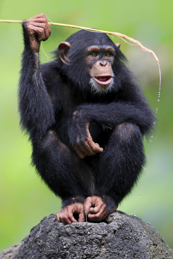

gorilla photo


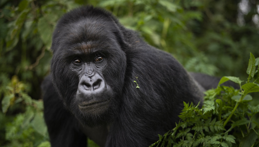

orangutan photo


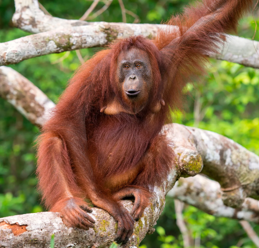

baboon photo


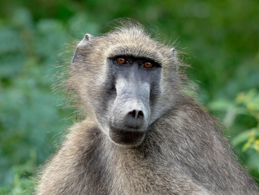

capuchin monkey photo


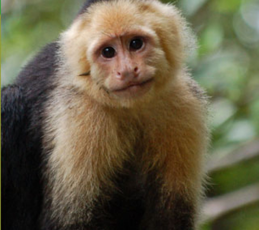

In [6]:
# view one image of animals in the primates category
primates = 'chimpanzee', 'gorilla', 'orangutan', 'baboon', 'capuchin monkey'
for i in primates:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)

beaver photo


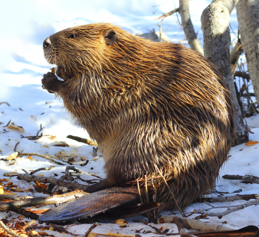

squirrel photo


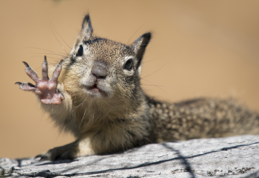

porcupine photo


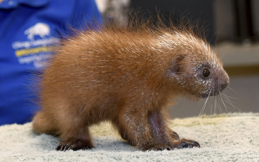

rat photo


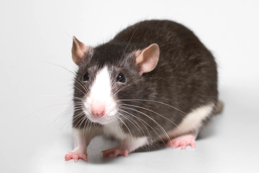

mouse photo


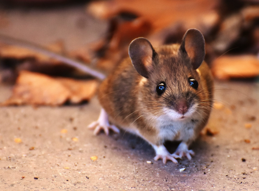

In [7]:
# view one image of animals in the rodents category
rodents =  'beaver', 'squirrel', 'porcupine', 'rat', 'mouse'
for i in rodents:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)

deer photo


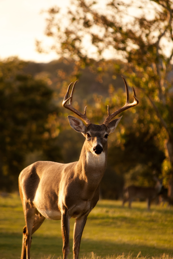

elk photo


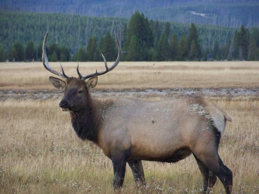

moose photo


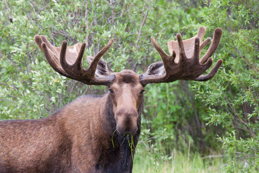

giraffe photo


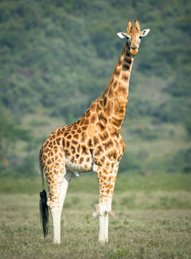

zebra photo


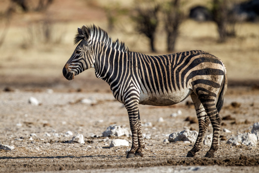

In [8]:
# view one image of animals in the ungulates category
ungulates =  'deer', 'elk', 'moose', 'giraffe', 'zebra'
for i in ungulates:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)

lion photo


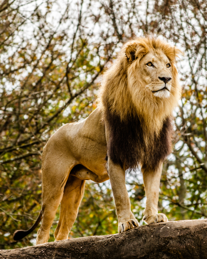

tiger photo


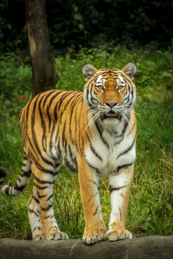

leopard photo


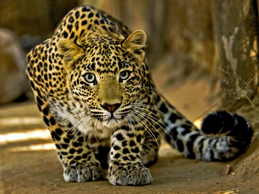

wolve photo


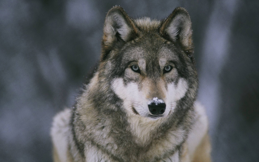

bear photo


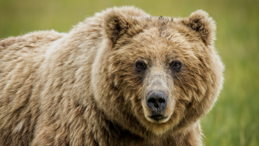

In [9]:
# view one image of animals in the carnivores category
carnivores = 'lion', 'tiger', 'leopard', 'wolve', 'bear'
for i in carnivores:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)

kangaroo photo


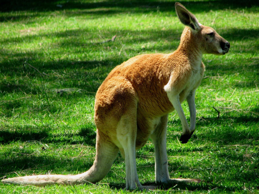

wallaby photo


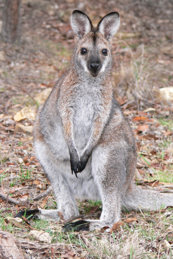

koala photo


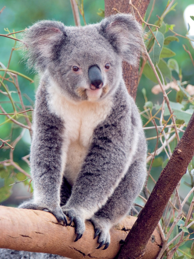

opossum photo


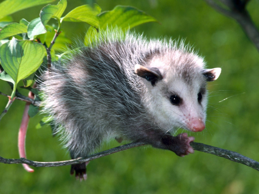

wombat photo


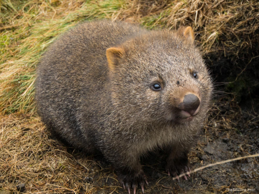

In [10]:
# view one image of animals in the marsupials category
marsupials = 'kangaroo', 'wallaby', 'koala', 'opossum', 'wombat'
for i in marsupials:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)

Lets start building our dataset

In [11]:
# build dataset 
searches =  'primates','rodents', 'ungulates', 'carnivores', 'marsupials'
path = Path('mammal_type')

for i in searches:
    dest = (path/i)
    dest.mkdir(exist_ok=True, parents=True)
    if i == 'primates':
        download_images(dest, urls=(search_images('chimpanzee photos')))
        sleep(10)
        download_images(dest, urls=(search_images('gorilla photos')))
        sleep(10)
        download_images(dest, urls=(search_images('orangutan photos')))
        sleep(10)
        download_images(dest, urls=(search_images('baboon photos')))
        sleep(10)
        download_images(dest, urls=(search_images('capuchin monkey photos')))
        sleep(10)
    elif i == 'rodents':
        download_images(dest, urls=(search_images('beaver photos')))
        sleep(10)
        download_images(dest, urls=(search_images('squirrel photos')))
        sleep(10)
        download_images(dest, urls=(search_images('porcupine photos')))
        sleep(10)
        download_images(dest, urls=(search_images('rat photos')))
        sleep(10)
        download_images(dest, urls=(search_images('mouse monkey photos')))
        sleep(10)
    elif i == 'ungulates':
        download_images(dest, urls=(search_images('deer photos')))
        sleep(10)
        download_images(dest, urls=(search_images('elk photos')))
        sleep(10)
        download_images(dest, urls=(search_images('moose photos')))
        sleep(10)
        download_images(dest, urls=(search_images('giraffe photos')))
        sleep(10)
        download_images(dest, urls=(search_images('zebra photos')))
        sleep(10)
    elif i == 'carnivores':
        download_images(dest, urls=(search_images('lion photos')))
        sleep(10)
        download_images(dest, urls=(search_images('tiger photos')))
        sleep(10)
        download_images(dest, urls=(search_images('leopard photos')))
        sleep(10)
        download_images(dest, urls=(search_images('wolve photos')))
        sleep(10)
        download_images(dest, urls=(search_images('bear photos')))
        sleep(10)
    elif i == 'marsupials':
        download_images(dest, urls=(search_images('kangeroo photos')))
        sleep(10)
        download_images(dest, urls=(search_images('wallaby photos')))
        sleep(10)
        download_images(dest, urls=(search_images('koala photos')))
        sleep(10)
        download_images(dest, urls=(search_images('opossum photos')))
        sleep(10)
        download_images(dest, urls=(search_images('wombat photos')))
        sleep(10)
    resize_images(path/i, max_size=400, dest=path/i)

Searching for: chimpanzee photos
Searching for: gorilla photos
Searching for: orangutan photos
Searching for: baboon photos
Searching for: capuchin monkey photos
Searching for: beaver photos
Searching for: squirrel photos
Searching for: porcupine photos
Searching for: rat photos
Searching for: mouse monkey photos
Searching for: deer photos
Searching for: elk photos
Searching for: moose photos
Searching for: giraffe photos
Searching for: zebra photos
Searching for: lion photos
Searching for: tiger photos
Searching for: leopard photos
Searching for: wolve photos
Searching for: bear photos
Searching for: kangeroo photos
Searching for: wallaby photos
Searching for: koala photos
Searching for: opossum photos
Searching for: wombat photos


In [12]:
# view length of images should be equal to 2500 
len(get_image_files(path))

2379

In [14]:
# verify images, remove and view failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

## Step 2: Train the Model

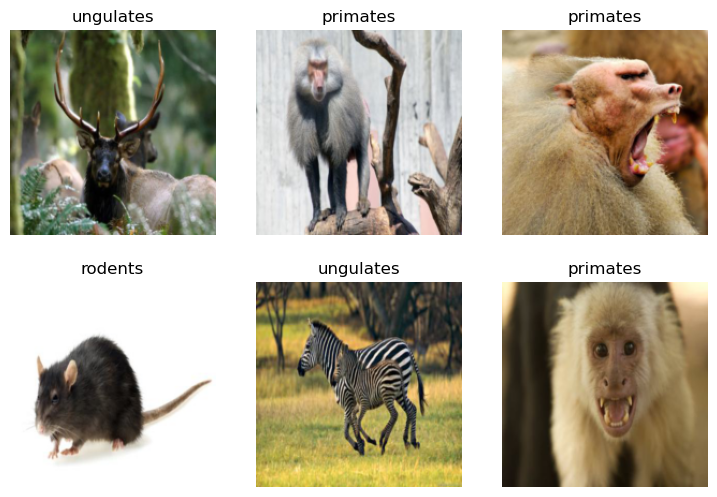

In [15]:
# create training and validation dataset
# note - change mammal type names to singular
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

data.show_batch(max_n=6)

In [ ]:
# train model using a pretrained model - resnet


## Step 3: Test the Model